In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

import importlib
import warnings


warnings.simplefilter('ignore')
importlib.reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\Al-Kh\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\machinelearning-9R1fJjQ4-py3.11\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
df = pd.read_csv('titanic3.csv', sep=';')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
#1. Определите количество мужчин и женщин, которые ехали на корабле
df.groupby('sex')['sex'].count()

sex
female    466
male      843
Name: sex, dtype: int64

In [19]:
#2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров
survived = df.groupby('survived')['survived'].count()
print(survived)
print(f"There are {survived.loc[1] / survived.sum() * 100:.1f}% survived passengers")

survived
0.0    809
1.0    500
Name: survived, dtype: int64
There are 38.2% survived passengers


In [20]:
#3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
pclass = df.groupby('pclass')['pclass'].count()
print(pclass)
print(f"There are {pclass.loc[1] / pclass.sum() * 100:.1f}% 1st class passengers")

pclass
1.0    323
2.0    277
3.0    709
Name: pclass, dtype: int64
There are 24.7% 1st class passengers


In [21]:
#4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров
df['age'] = df['age'].map(lambda x: x.replace(',', '.') if isinstance(x, str) else x).astype(float)
df['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
1309        NaN
Name: age, Length: 1310, dtype: float64

In [22]:
# средний возраст
round(df['age'].mean(), 1)

29.9

In [23]:
# медианный возраст
round(df['age'].median(), 1)

28.0

In [24]:
#5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
# коэффициент корреляции Пирсона / pvalue
df['sibsp'] = df['sibsp'].fillna(0)
df['parch'] = df['parch'].fillna(0)

print(scipy.stats.pearsonr(df['sibsp'], df['parch']))

PearsonRResult(statistic=0.37368895268437224, pvalue=1.1187892695057537e-44)


In [25]:
# pvalue << 0,001; статистически значимая зависимость

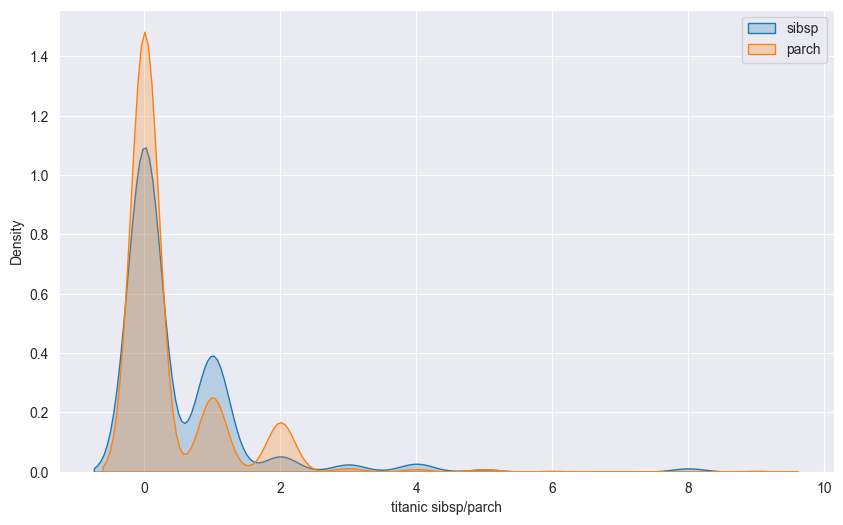

In [26]:
# распределение sibsp/parch
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='sibsp', label='sibsp', shade=True)
sns.kdeplot(data=df, x='parch', label='parch', shade=True)

plt.legend()
plt.xlabel('titanic sibsp/parch')
plt.show()

In [27]:
#6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
df['first_name'] = df['name'].str.split(',').str[0]
print(f"Самое распространенное женское имя: {df[df['sex'] == 'female']['first_name'].mode()[0]}")

Самое распространенное женское имя: Andersson


In [28]:
#7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
# коэффициент корреляции Пирсона / pvalue
pclass = df['pclass'].dropna()
surv = df['survived'].dropna()
print(scipy.stats.pearsonr(pclass, surv))

PearsonRResult(statistic=-0.3124693626496773, pvalue=4.8700291105774905e-31)


In [29]:
# pvalue << 0,001; статистически значимая зависимость

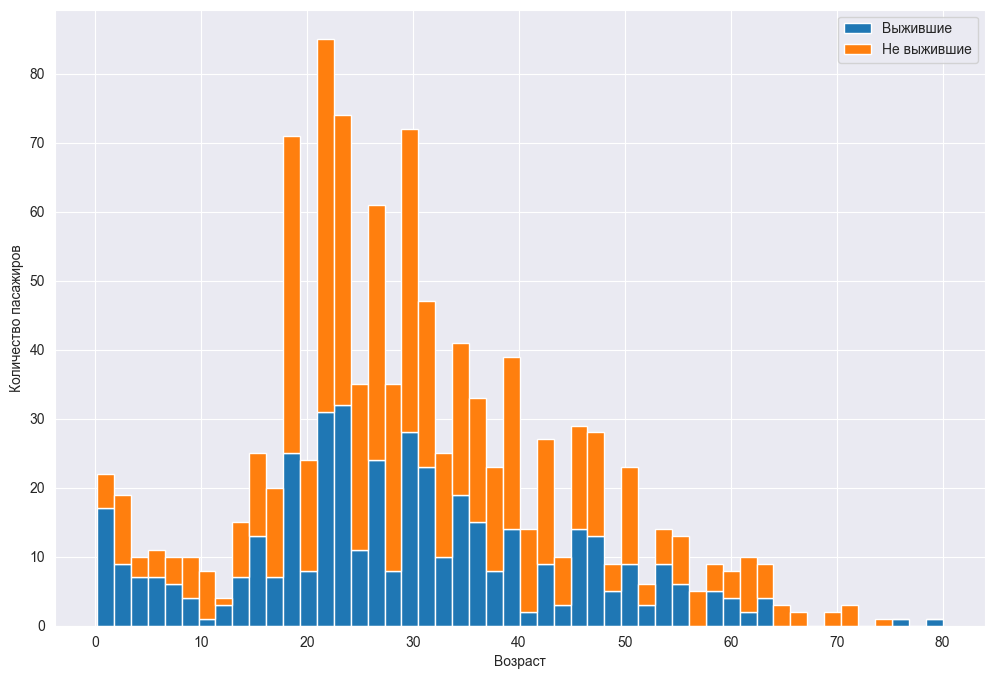

In [30]:
#8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном или нескольких графиках
survived = df[df['survived'] == 1]['age'].dropna().sort_values()
not_survived = df[df['survived'] == 0]['age'].dropna().sort_values()

plt.figure(figsize=(12, 8))
plt.hist([survived, not_survived], bins=50, stacked=True, label=['Выжившие', 'Не выжившие'], histtype='barstacked')
plt.xlabel('Возраст')
plt.ylabel('Количество пасажиров')
plt.legend()
plt.show()

In [31]:
# Вывод:
# Оценив график, можно прийти к выводу, что спасали в первую очередь детей и стариков, так как в промежуточных возрастах доля погибших значительно больше

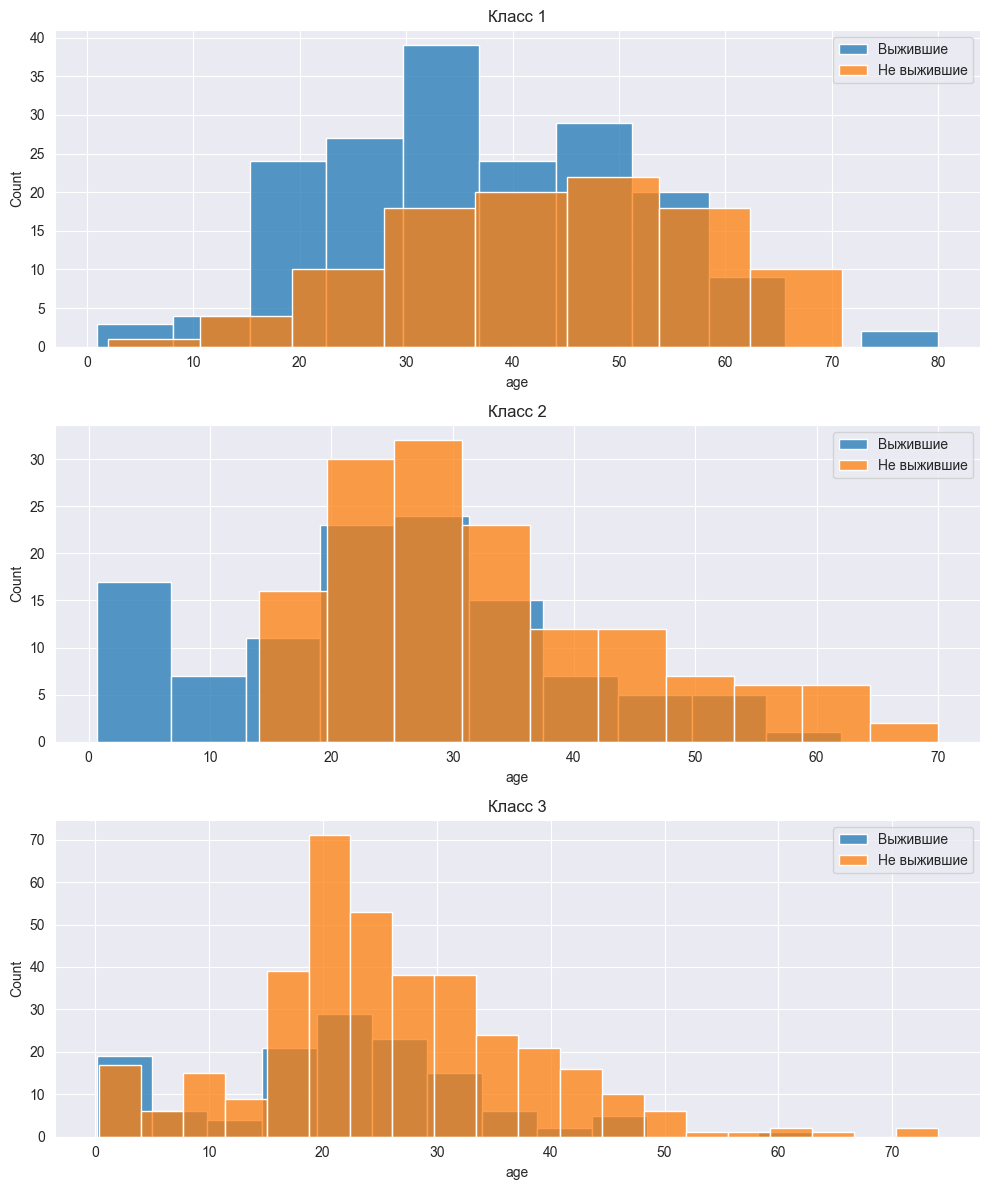

In [32]:
#9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы.
# удаляем мусор из данных
df = df.dropna(subset=['pclass'])
df['pclass'] = df['pclass'].astype(int)

# поиск количества уникальных классов
num_classes = df['pclass'].nunique()

# Создание "фигуры" с подграфиком для каждого класса
fig, ax = plt.subplots(num_classes, 1, figsize=(10, 4 * num_classes))

# Ensure ax is always an array, even when num_classes is 1
if num_classes == 1:
    ax = np.array([ax])

# Для каждого класса
classes = sorted(df['pclass'].unique())
survivors = df[df['survived'] == 1]
non_survivors = df[df['survived'] == 0]

for i, pclass in enumerate(classes):
    # гистограмма выживших по возрасту для этого класса
    survivors_data = survivors[survivors['pclass'] == pclass]['age'].dropna()
    if not survivors_data.empty:
        sns.histplot(survivors_data, ax=ax[i], kde=False, label='Выжившие')

    # гистограмма не выживших по возрасту для этого класса
    non_survivors_data = non_survivors[non_survivors['pclass'] == pclass]['age'].dropna()
    if not non_survivors_data.empty:
        sns.histplot(non_survivors_data, ax=ax[i], kde=False, label='Не выжившие')

    ax[i].set_title(f'Класс {pclass}')
    if ax[i].get_legend_handles_labels()[0]:  # проверка наличия подписи для легенды
        ax[i].legend()

# Показываем графики
plt.tight_layout()
plt.show()

In [33]:
# Вывод:
# Проанализировав графики по классам можно сделать вывод, что спасали в первую очередь пассажиров первого класса, так как среди них больше всего выживших, и в последнюю очередь пытались спасать пассажиров третьего класса, так как среди них больше всего погибших

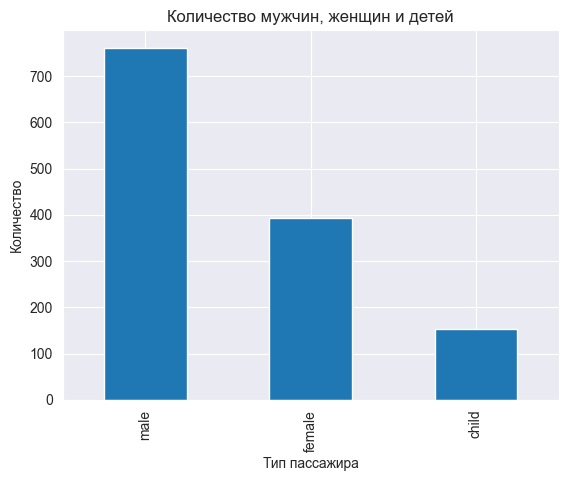

In [34]:
#10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.
df['person'] = df.apply(lambda row: 'child' if row['age'] < 18 else row['sex'],
                        axis=1)  # добавляем столбец, чтобы различать пассажиров по полу и возрасту (ребенок моложе 18 лет)

df['person'].value_counts().plot(kind='bar')
plt.title('Количество мужчин, женщин и детей')
plt.xlabel('Тип пассажира')
plt.ylabel('Количество')
plt.show()